In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
x_train = np.load("data/x_train_mix_ayn.npy")
y_train = np.load("data/y_train_mix_ayn.npy")
x_test = np.load("data/x_test_mix_ayn.npy")
y_test = np.load("data/y_test_mix_ayn.npy")

In [3]:
input_shape = x_train.shape[1:]
input_shape

(148, 431, 3)

In [4]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax'),
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 191364)            0         
                                                                 
 dense (Dense)               (None, 128)               24494720  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 24,495,365
Trainable params: 24,495,365
Non-trainable params: 0
_________________________________________________________________


In [43]:
model1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist1 = model1.fit(
    x_train, 
    y_train,
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 3s 80ms/step - loss: 18339.7324 - accuracy: 0.3345 - val_loss: 10873.4717 - val_accuracy: 0.3380
Epoch 2/30
37/37 [==============================] - 3s 77ms/step - loss: 4226.4077 - accuracy: 0.5127 - val_loss: 983.4187 - val_accuracy: 0.6660
Epoch 3/30
37/37 [==============================] - 3s 77ms/step - loss: 981.6823 - accuracy: 0.7109 - val_loss: 1590.5288 - val_accuracy: 0.4840
Epoch 4/30
37/37 [==============================] - 3s 77ms/step - loss: 947.3057 - accuracy: 0.6864 - val_loss: 1369.4612 - val_accuracy: 0.5660
Epoch 5/30
37/37 [==============================] - 3s 78ms/step - loss: 1022.1664 - accuracy: 0.7091 - val_loss: 3082.3411 - val_accuracy: 0.5880
Epoch 6/30
37/37 [==============================] - 3s 77ms/step - loss: 733.4219 - accuracy: 0.7655 - val_loss: 933.7596 - val_accuracy: 0.6760
Epoch 7/30
37/37 [==============================] - 3s 78ms/step - loss: 340.9638 - accuracy: 0.8691 - val_loss: 773.0616

In [44]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss ='SparseCategoricalCrossentropy', 
    metrics=['accuracy'])

In [45]:
hist2 = model2.fit(
    x_train, 
    y_train,    
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
37/37 [==============================] - 39s 1s/step - loss: 4476.8696 - accuracy: 0.3664 - val_loss: 59.6962 - val_accuracy: 0.4880
Epoch 2/30
37/37 [==============================] - 38s 1s/step - loss: 13.6924 - accuracy: 0.7882 - val_loss: 19.9428 - val_accuracy: 0.6060
Epoch 3/30
37/37 [==============================] - 38s 1s/step - loss: 1.4189 - accuracy: 0.9264 - val_loss: 21.0334 - val_accuracy: 0.5920
Epoch 4/30
37/37 [==============================] - 38s 1s/step - loss: 0.3206 - accuracy: 0.9764 - val_loss: 19.2273 - val_accuracy: 0.5900
Epoch 5/30
37/37 [==============================] - 38s 1s/step - loss: 0.0467 - accuracy: 0.9945 - val_loss: 20.5578 - val_accuracy: 0.6100
Epoch 6/30
37/37 [==============================] - 38s 1s/step - loss: 0.0426 - accuracy: 0.9945 - val_loss: 19.0563 - val_accuracy: 0.6220
Epoch 7/30
37/37 [==============================] - 39s 1s/step - loss: 0.0132 - accuracy: 0.9982 - val_loss: 19.7253 - val_accuracy: 0.6180
Epoch 8/3

In [46]:
model2.save("saved_models_mix_ayn/model2.h5")
with open('saved_models_mix_ayn/history2.json', 'w') as handle: # saving the history of the model
    json.dump(hist2.history, handle)

Transfer Learning

In [15]:
model = tf.keras.applications.MobileNetV2(
    input_shape=input_shape, 
    include_top=False, 
    weights='imagenet')
model.trainable = False

model_tl = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        model,
        # tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=5, activation='softmax')
    ]
)
model_tl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 14, 1280)      2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 89600)             0         
                                                                 
 dense_6 (Dense)             (None, 5)                 448005    
                                                                 
Total params: 2,705,989
Trainable params: 448,005
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model_tl.compile(tf.keras.optimizers.Adam(),
                 loss='SparseCategoricalCrossentropy',
                 metrics=['accuracy'])
hist_tl = model_tl.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=30, 
    validation_data=(x_test, y_test))

Epoch 1/10
37/37 [==============================] - 25s 638ms/step - loss: 15.6796 - accuracy: 0.4509 - val_loss: 2.4838 - val_accuracy: 0.7160
Epoch 2/10
37/37 [==============================] - 22s 613ms/step - loss: 2.4986 - accuracy: 0.7500 - val_loss: 2.4690 - val_accuracy: 0.6720
Epoch 3/10
37/37 [==============================] - 22s 611ms/step - loss: 0.8755 - accuracy: 0.8618 - val_loss: 2.0623 - val_accuracy: 0.6880
Epoch 4/10
37/37 [==============================] - 23s 615ms/step - loss: 0.2591 - accuracy: 0.9391 - val_loss: 1.7750 - val_accuracy: 0.7580
Epoch 5/10
37/37 [==============================] - 23s 636ms/step - loss: 0.1591 - accuracy: 0.9555 - val_loss: 1.5423 - val_accuracy: 0.7400
Epoch 6/10
37/37 [==============================] - 24s 647ms/step - loss: 0.0378 - accuracy: 0.9927 - val_loss: 1.4651 - val_accuracy: 0.7780
Epoch 7/10
37/37 [==============================] - 23s 630ms/step - loss: 0.0404 - accuracy: 0.9891 - val_loss: 1.6208 - val_accuracy: 0.784

In [40]:
# # fine-tuning - NOT WORKING
# model.trainable = True
# model_tl.compile(
#     optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
#     loss='SparseCategoricalCrossentropy',
#     metrics=['accuracy']
# )
# model_tl.fit(x_train, y_train, epochs=10, batch_size=30, validation_data=(x_test, y_test))

Epoch 1/10
37/37 [==============================] - 88s 2s/step - loss: 24.9900 - accuracy: 0.2545 - val_loss: 11.1666 - val_accuracy: 0.5440
Epoch 2/10
37/37 [==============================] - 84s 2s/step - loss: 6.0770 - accuracy: 0.4973 - val_loss: 13.7109 - val_accuracy: 0.4860
Epoch 3/10
37/37 [==============================] - 84s 2s/step - loss: 3.5278 - accuracy: 0.6445 - val_loss: 12.2000 - val_accuracy: 0.5180
Epoch 4/10
37/37 [==============================] - 84s 2s/step - loss: 2.2289 - accuracy: 0.7291 - val_loss: 10.7661 - val_accuracy: 0.5480
Epoch 5/10
37/37 [==============================] - 84s 2s/step - loss: 1.4496 - accuracy: 0.7882 - val_loss: 9.5840 - val_accuracy: 0.5760
Epoch 6/10
37/37 [==============================] - 84s 2s/step - loss: 1.0712 - accuracy: 0.8300 - val_loss: 9.0245 - val_accuracy: 0.5760
Epoch 7/10
37/37 [==============================] - 84s 2s/step - loss: 0.8489 - accuracy: 0.8636 - val_loss: 8.6863 - val_accuracy: 0.5780
Epoch 8/10
37/3

In [17]:
model_tl.save("saved_models_mix_ayn/model_tl.h5")
with open('saved_models_mix_ayn/history_tl.json', 'w') as handle: # saving the history of the model
    json.dump(hist_tl.history, handle)

### Visualizations

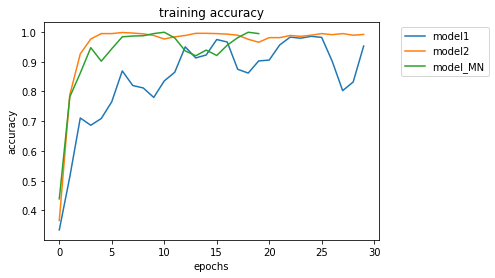

In [47]:
plt.plot(hist1.history["accuracy"], label="model1")
plt.plot(hist2.history["accuracy"], label="model2")
plt.plot(hist_tl.history["accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

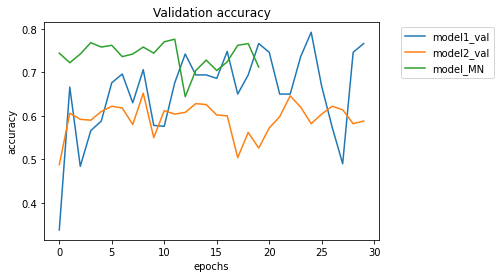

In [48]:
plt.plot(hist1.history["val_accuracy"], label="model1_val")
plt.plot(hist2.history["val_accuracy"], label="model2_val")
plt.plot(hist_tl.history["val_accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Validation accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

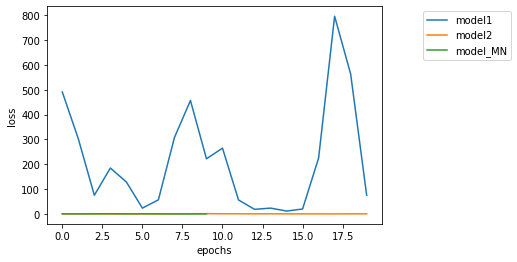

In [49]:
plt.plot(hist1.history["loss"][10:], label="model1")
plt.plot(hist2.history["loss"][10:], label="model2")
plt.plot(hist_tl.history["loss"][10:],label="model_MN")

# plt.plot(hist1.history["val_loss"][10:], label="model1_val")
# plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"][10:], label="model_fe_val")
# plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

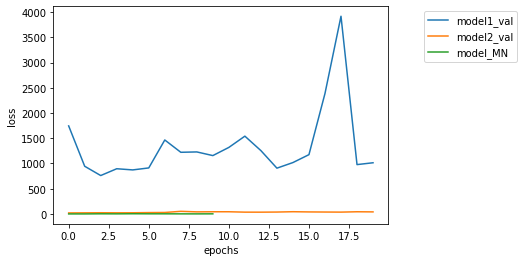

In [50]:
plt.plot(hist1.history["val_loss"][10:], label="model1_val")
plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"], label="model_fe_val")
plt.plot(hist_tl.history["val_loss"][10:],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Evaluate accuracy with test set

In [8]:
loss1, acc1 = model1.evaluate(x_test, y_test)
loss2, acc2 = model2.evaluate(x_test, y_test)
# loss_fe, acc_fe = model_fe.evaluate(x_test, y_test)
loss_tl, acc_tl = model_tl.evaluate(x_test, y_test)

16/16 [==============================] - 7s 448ms/step - loss: 1.7891 - accuracy: 0.7660


In [9]:
pred = model_tl.predict(x_test)
labels = tf.argmax(pred, axis=1)
cm = tf.math.confusion_matrix(labels, y_test)

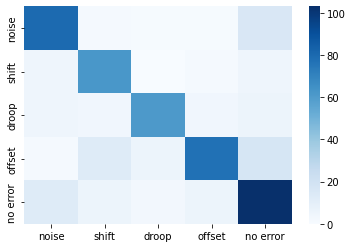

In [10]:
import seaborn as sns

l = ["noise", "shift", "droop", "offset", "no error"]
ax = sns.heatmap(cm, cmap="Blues")
ax.xaxis.set_ticklabels(l)
ax.yaxis.set_ticklabels(l)
plt.show()